--- ENTRENAMIENTO PERCEPTRÓN PARA COMPUERTA OR ---
Predicciones en datos de prueba: [0 1 1 0]
Accuracy del Perceptrón OR: 1.0



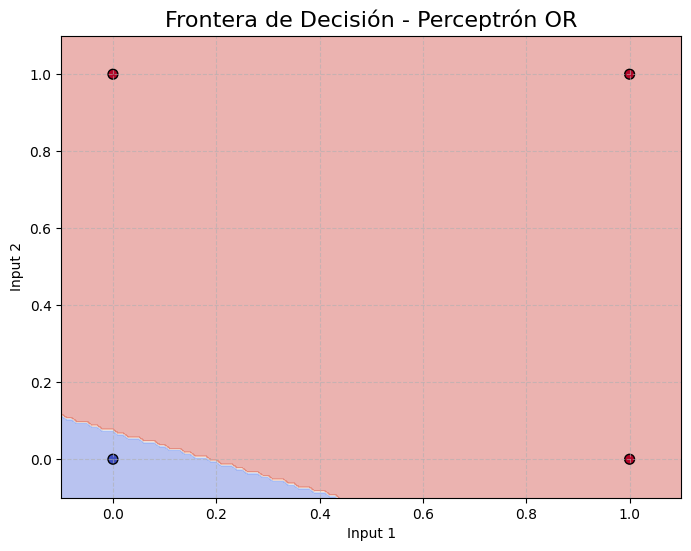

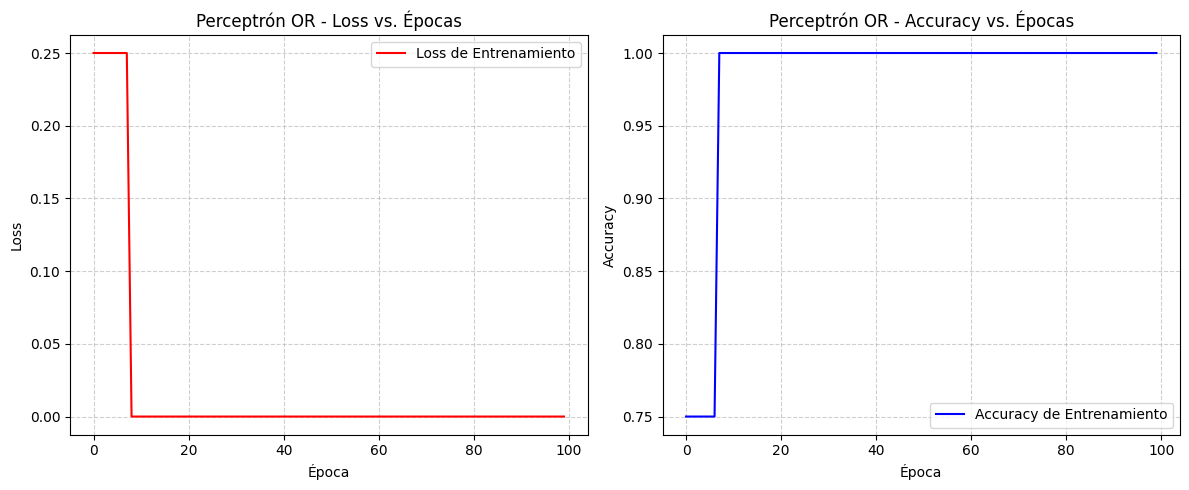

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- ENTRENAMIENTO PERCEPTRÓN MULTICAPA PARA COMPUERTA XOR ---
Accuracy del Perceptrón XOR: 100.00%
Loss del Perceptrón XOR: 0.3675



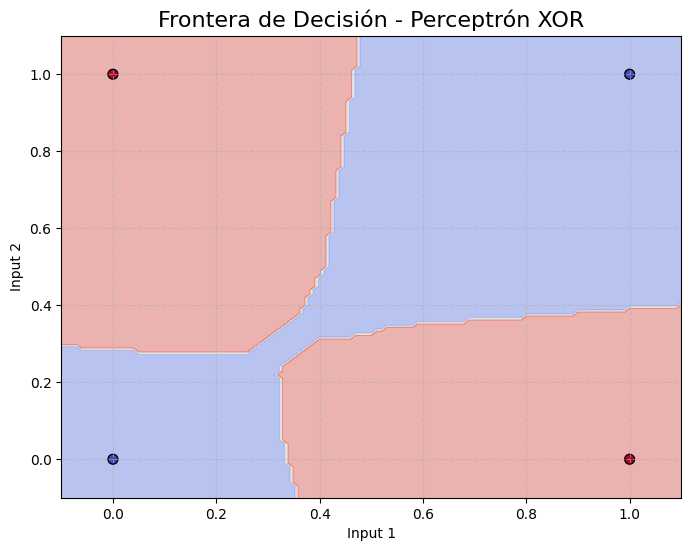

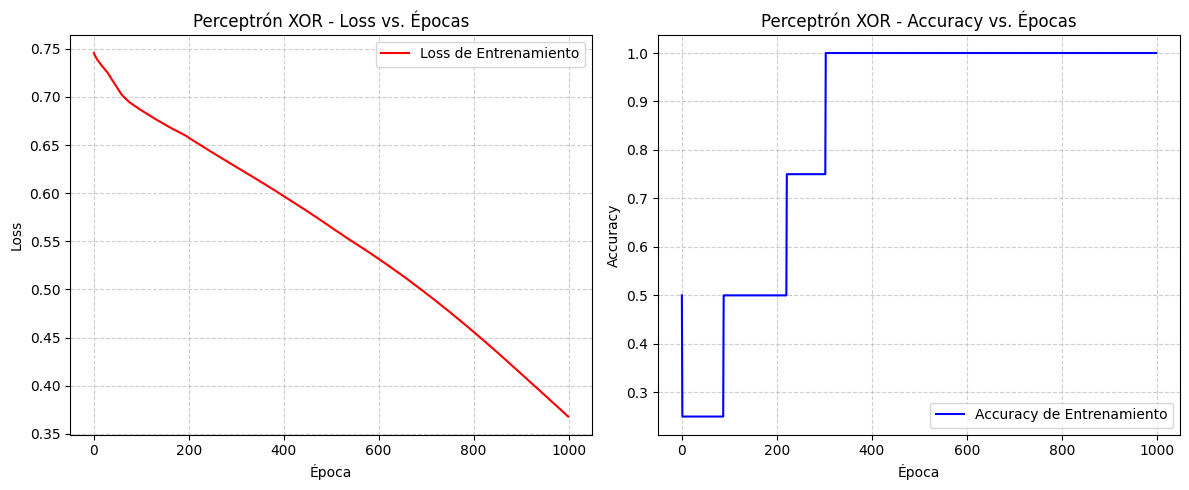

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
import random

# ==============================================================================
# SEMILLA DE REPRODUCIBILIDAD
# Se establece una semilla para numpy y tensorflow para que los resultados
# que dependen de la aleatoriedad (como la inicialización de pesos en redes
# neuronales más complejas) sean consistentes en cada ejecución.
# ==============================================================================
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# ==============================================================================
# FUNCIÓN PARA GRAFICAR FRONTERA DE DECISIÓN
# ==============================================================================
def plot_decision_boundary(X, y, model, title):
    """
    Función para visualizar la frontera de decisión de un modelo de clasificación.

    Parámetros:
    X (np.array): Datos de entrada.
    y (np.array): Etiquetas verdaderas.
    model: Modelo entrenado (puede ser MyPerceptron o un modelo de Keras).
    title (str): Título para la gráfica.
    """
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Crear una malla de puntos para realizar predicciones
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Realizar predicciones sobre la malla
    # Se comprueba si el modelo es de Keras o es el perceptrón personalizado
    if hasattr(model, 'predict') and isinstance(model, tf.keras.Model):
        Z = (model.predict(grid, verbose=0) > 0.5).astype(int)
    else:
        Z = model.predict(grid)

    Z = Z.reshape(xx.shape)

    # Graficar el contorno y los puntos de datos
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=50, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title, fontsize=16)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# ==============================================================================
# FUNCIÓN PARA GRAFICAR HISTORIAL DE ENTRENAMIENTO
# ==============================================================================
def plot_training_history(history, title_prefix):
    """
    Función para graficar el Loss y Accuracy del entrenamiento.

    Parámetros:
    history (dict): Diccionario con el historial de 'loss' y 'accuracy'.
    title_prefix (str): Prefijo para los títulos de las gráficas.
    """
    # Grafica de Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Loss de Entrenamiento', color='red')
    plt.title(f'{title_prefix} - Loss vs. Épocas')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    # Grafica de Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Accuracy de Entrenamiento', color='blue')
    plt.title(f'{title_prefix} - Accuracy vs. Épocas')
    plt.xlabel('Época')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


# ==============================================================================
# PERCEPTRÓN PARA COMPUERTA OR
# ==============================================================================

# Defining boolean constants
T=1.0
F=0.0

# creating data for logical OR operation
def get_OR_data():
    X=[
        [F,F],
        [F,T],
        [T,F],
        [T,T]
    ]
    Y=[
        [F],
        [T],
        [T],
        [T]
    ]
    return X,Y

X_or, Y_or = get_OR_data()

class MyPerceptron:
    def __init__(self,learning_rate=0.1,n_iterations=1000):
        self.lr=learning_rate
        self.epochs=n_iterations
        self.weights=None
        self.bias=None
        # NUEVA ADICIÓN: Listas para guardar el historial de entrenamiento
        self.loss_history = []
        self.acc_history = []

    def Step_activ_func(self,activation):
        if(activation>=0):
            return 1
        else:
            return 0

    def fit(self,X,Y):
      # Defining the shape of weight and bias.
      # MODIFICACIÓN: Se inicializan los pesos aleatoriamente para un mejor entrenamiento
      self.weights = np.random.rand(X.shape[1])
      self.bias = np.random.rand(1)

      # training the model on X_train and Y_train
      for epoch in range(self.epochs):
          total_mae = 0
          for i in range(X.shape[0]):
            # Deciding the activation function
            Y_pred= self.Step_activ_func(np.dot(self.weights,X[i]) + self.bias)
            # Deciding the loss function
            mae=Y[i]-Y_pred
            total_mae += np.abs(mae)
            # Updating the weight and bias using optimization algorithm
            self.weights=self.weights + self.lr * mae * X[i]
            self.bias=self.bias + self.lr * mae

          # NUEVA ADICIÓN: Calcular y guardar Loss y Accuracy de la época
          epoch_preds = self.predict(X)
          epoch_acc = accuracy_score(Y.flatten(), epoch_preds.flatten())
          epoch_loss = total_mae / X.shape[0]

          self.loss_history.append(epoch_loss)
          self.acc_history.append(epoch_acc)

    def predict(self, X):
        Y_predicted = []
        for i in range(X.shape[0]):
            Y_pred = self.Step_activ_func(np.dot(self.weights, X[i]) + self.bias)
            Y_predicted.append(Y_pred)
        return np.array(Y_predicted)

# Entrenamiento y evaluación del perceptrón para OR
print("--- ENTRENAMIENTO PERCEPTRÓN PARA COMPUERTA OR ---")
clf=MyPerceptron(n_iterations=100) # Se reducen las épocas para una mejor visualización

X_or = np.array(X_or)
Y_or = np.array(Y_or)

clf.fit(X_or,Y_or)

X_test_or=[
        [F,F],
        [T,F],
        [F,T],
        [F,F]
    ]
Y_test_or=[
        [F],
        [T],
        [T],
        [F]
    ]
X_test_or=np.array(X_test_or)
Y_test_or=np.array(Y_test_or)
Y_predicted=clf.predict(X_test_or)
print(f"Predicciones en datos de prueba: {Y_predicted}")
print(f"Accuracy del Perceptrón OR: {accuracy_score(Y_test_or,Y_predicted)}\n")

# ==============================================================================
# GRÁFICAS PARA EL PERCEPTRÓN OR
# ==============================================================================
# 1. Graficar Frontera de Decisión
plot_decision_boundary(X_or, Y_or, clf, "Frontera de Decisión - Perceptrón OR")

# 2. Graficar Historial de Entrenamiento (Loss y Accuracy)
or_history = {'loss': clf.loss_history, 'accuracy': clf.acc_history}
plot_training_history(or_history, "Perceptrón OR")


# ==============================================================================
# PERCEPTRÓN MULTICAPA PARA COMPUERTA XOR
# ==============================================================================
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def get_XOR_data():
    X=[
        [F,F],
        [F,T],
        [T,F],
        [T,T]
    ]
    Y=[
        [F],
        [T],
        [T],
        [F]
    ]
    return X,Y

X_xor,Y_xor = get_XOR_data()

X_test_xor=[
        [T,F],
        [T,T],
        [F,T],
        [F,F]
    ]
Y_test_xor=[
        [T],
        [F],
        [T],
        [F]
    ]

X_xor = np.array(X_xor)
Y_xor = np.array(Y_xor)
X_test_xor = np.array(X_test_xor)
Y_test_xor = np.array(Y_test_xor)

model=Sequential()
model.add(Dense(16,input_shape=(2,),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])

# MODIFICACIÓN: Se guarda el historial del entrenamiento en la variable 'history'
print("\n--- ENTRENAMIENTO PERCEPTRÓN MULTICAPA PARA COMPUERTA XOR ---")
history = model.fit(X_xor, Y_xor, epochs=1000, verbose=0) # verbose=0 para no imprimir el log de épocas

loss,accuracy=model.evaluate(X_test_xor,Y_test_xor,verbose=0)
print(f'Accuracy del Perceptrón XOR: {accuracy*100:.2f}%')
print(f'Loss del Perceptrón XOR: {loss:.4f}\n')


# ==============================================================================
# GRÁFICAS PARA EL PERCEPTRÓN XOR
# ==============================================================================
# 1. Graficar Frontera de Decisión
plot_decision_boundary(X_xor, Y_xor, model, "Frontera de Decisión - Perceptrón XOR")

# 2. Graficar Historial de Entrenamiento (Loss y Accuracy)
plot_training_history(history.history, "Perceptrón XOR")